In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load dataset

df = pd.read_csv("student_scores.csv")

In [3]:
# visualize the top 5 rows of the data

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

## Exploratory Data Analysis

In [9]:
# Check for missing data

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### No NaN values are present in the dataset

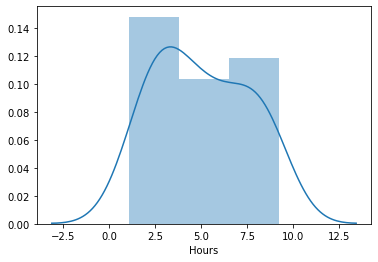

In [6]:
# Plotting the distribution of hours attribute

sns.distplot(df["Hours"])

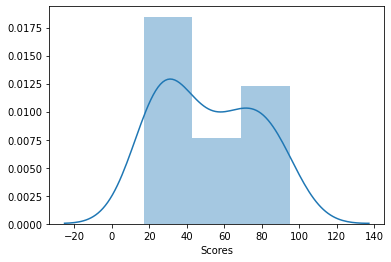

In [8]:
# Plotting the distribution of score attribute

sns.distplot(df["Scores"])

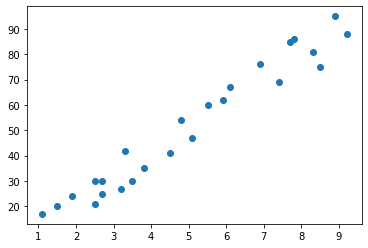

In [10]:
# Plotting hours against scores

plt.scatter(df["Hours"],df["Scores"])

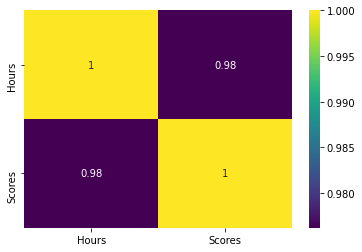

In [11]:
# Finding the correlation between attributes

sns.heatmap(df.corr(),annot=True,cmap="viridis")

#### Hours and Scores have a high positive correlation between them

## Building the Model

In [16]:
X = df["Hours"]
X = np.array(X).reshape(-1,1)
y = df["Scores"]

In [17]:
# Train and Test split

from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
# Creating a Linear Regression model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Test Predicition

prediction = lr.predict(Xtest)

In [22]:
# Calculating the RMSE score for the model

from sklearn.metrics import mean_squared_error
from math import sqrt

score = sqrt(mean_squared_error(ytest,prediction))
print(f'''Score: {score}''')

Score: 4.647447612100373


In [23]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Final Prediction 

In [27]:
# Predicting the output for our custom input

inputval = np.array(9.25).reshape(-1,1) 
output = lr.predict(inputval)

In [30]:
print(f'''Predicted score if a student studies for 9.25 hrs/day : {output[0].round(2)}''')

Predicted score if a student studies for 9.25 hrs/day : 92.91
